# Hydrogen Line Ratio Analysis

In [25]:
import numpy as np
import pyspeckit.spectrum.models.hydrogen as hh

Hummer & Storey give much different values than these; I think the pyspeckit tabulations are just wrong.  Ratios come out close though...

In [ ]:
hh.r_to_hbeta['pfundb'], hh.r_to_hbeta['bracketta']

In [61]:
# :2 means 'average the 5000 and 10000 K cases'
pfb_to_bra = (hh.r_to_hbeta['pfundb'] / hh.r_to_hbeta['bracketta'])[:2].mean()
pfb_to_bra, (hh.r_to_hbeta['pfundb'] / hh.r_to_hbeta['bracketta'])[:2].std()

(0.2036392153516345, 0.005323419646503458)

In [148]:
from pyspeckit.spectrum.models.hydrogen import retrieve_storey1995

In [256]:
d1e4_caseA = retrieve_storey1995(case='a')
d1e4_caseA1e4 = d1e4_caseA[10000., 1, 10000.0, 'A', 2, 65]

In [257]:
pfb_to_bra_caseA =  d1e4_caseA1e4[(7,5)] / d1e4_caseA1e4[(5,4)]
hue_to_pfb_caseA = d1e4_caseA1e4[11,6] / d1e4_caseA1e4[7,5]
hue_to_pfb_caseA = d1e4_caseA1e4[11,6] / d1e4_caseA1e4[7,5]
pfhe_to_bra_caseA = (d1e4_caseA1e4[11,6] + d1e4_caseA1e4[7,5]) / d1e4_caseA1e4[5,4]
pfb_to_bra_caseA, pfhe_to_bra_caseA, hue_to_pfb_caseA, hue_to_pfb_caseA

(0.20545977011494254,
 0.2377210433244916,
 0.1570199031737493,
 0.1570199031737493)

In [149]:
d1e4 = retrieve_storey1995()
d1e41e4 = d1e4[10000., 1, 10000.0, 'B', 2, 65]
d1e41e4[(11,6)] / d1e41e4[(4,2)]

0.002467741935483871

In [153]:
pfb_to_bra =  d1e41e4[(7,5)] / d1e41e4[(5,4)]
pfb_to_bra

0.20283996683250416

In [154]:
hue_to_pfb = d1e41e4[11,6] / d1e41e4[7,5]
hue_to_pfb

0.15636177823198774

In [155]:
pfhe_to_bra = (d1e41e4[11,6] + d1e41e4[7,5]) / d1e41e4[5,4]
pfhe_to_bra

0.2345563847429519

In [258]:
pfb_to_bra, pfhe_to_bra, hue_to_pfb, hue_to_pfb

(0.20283996683250416,
 0.2345563847429519,
 0.15636177823198774,
 0.15636177823198774)

In [156]:
from astropy import units as u
import dust_extinction
from dust_extinction.averages import RRP89_MWGC, CT06_MWGC, F11_MWGC, G21_MWAvg
from dust_extinction.parameter_averages import CCM89

In [157]:
CT06_MWGC()(4.05*u.um), CT06_MWGC()(4.66*u.um)

(0.054328959999999996, 0.04927807725321888)

In [158]:
A405 = CT06_MWGC()(4.05*u.um)
A466 = CT06_MWGC()(4.66*u.um)
AV = 30
pfb_to_bra_av30 = 10**(-(A466 - A405)*AV / 2.5) * pfb_to_bra
pfb_to_bra_av30

0.23321910470499274

In [159]:
pfbhe_to_bra_av30 = 10**(-(A466 - A405)*AV / 2.5) * pfhe_to_bra
pfbhe_to_bra_av30

0.2696856586343375

In [246]:
AVhuge=150
pfbhe_to_bra_avhugh = 10**(-(A466 - A405)*AVhuge / 2.5) * pfhe_to_bra
pfbhe_to_bra_avhugh

0.4713030214531702

In [248]:
A405 * AVhuge

8.149344

In [252]:
# EM ~ 10^6?
(d1e41e4[5,4] * u.erg/u.s/u.cm**3 * 1e4*u.cm**-3 * (1e6*u.cm**6*u.pc**-1) * 0.1*u.pc).to(u.erg/u.s)

<Quantity 9.648e-18 erg / s>

In [247]:
10**(-A405 * AVhuge / 2.5)

0.0005498730058616949

In [253]:
10**(-A405 * 30 / 2.5)

0.22287044488994426

In [254]:
10**(-A405 * AVhuge / 2.5) / 10**(-A405 * 30 / 2.5)

0.002467231606834311

In [160]:
from astropy.io import fits
import reproject

In [7]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [8]:
f466ns = fits.getdata(f'{basepath}/images/F466_minus_F410cont_refitted466wcsto410_merged_destarred6.fits')
f405ns = fits.getdata(f'{basepath}/images/F405_minus_F410cont_refitted405wcsto410_merged_destarred6.fits')

In [10]:
%matplotlib inline
import pylab as pl

In [193]:
p466 = 15

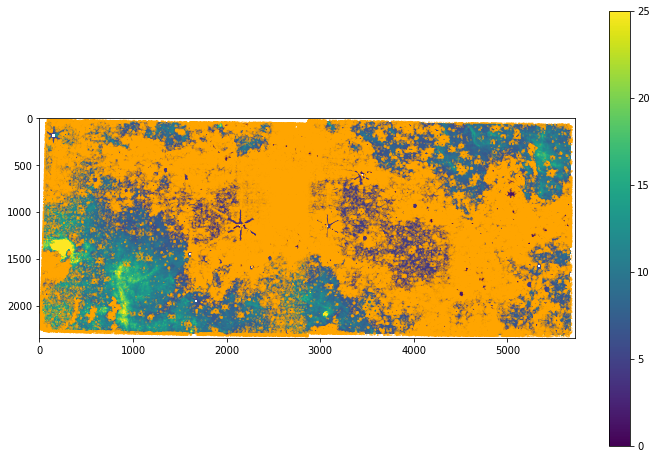

In [194]:
pl.figure(figsize=(12,8))
pl.imshow(f466ns.T, vmax=25)
pl.colorbar();
pl.contour(f466ns.T, levels=[np.nanpercentile(f466ns, p466)], colors=['orange']);

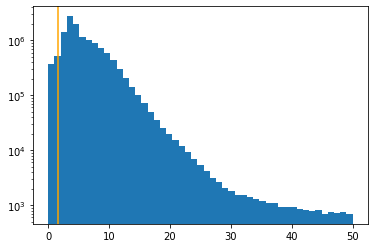

In [181]:
pl.hist(f466ns[np.isfinite(f466ns)], bins=np.linspace(0, 50), log=True);
pl.axvline(np.nanpercentile(f466ns, p466), color='orange');

In [190]:
p405 = 15

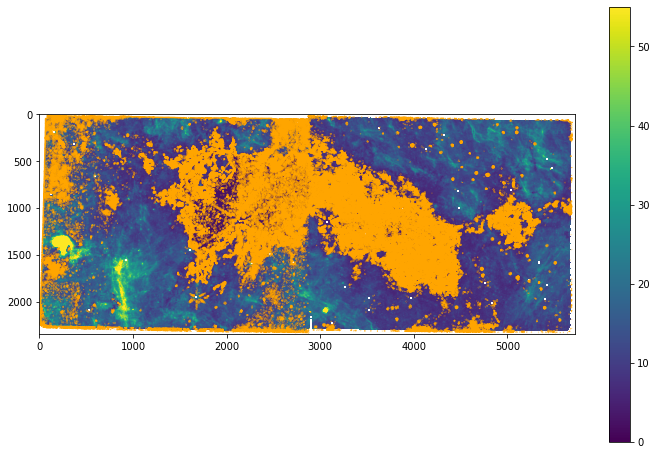

In [191]:
pl.figure(figsize=(12,8))
pl.imshow(f405ns.T, vmax=55, vmin=0)
pl.colorbar();
pl.contour(f405ns.T, levels=[np.nanpercentile(f405ns, p405)], colors=['orange']);

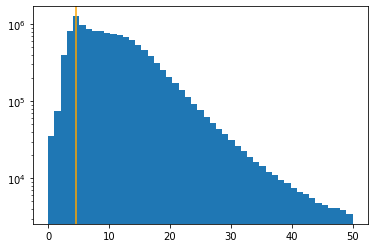

In [192]:
pl.hist(f405ns[np.isfinite(f405ns)], bins=np.linspace(0, 50), log=True);
pl.axvline(np.nanpercentile(f405ns, p405), color='orange');

In [230]:
import pylab as plt
def discrete_cmap(N, base_cmap=None):
    """
    Create an N-bin discrete colormap from the specified input map
    https://gist.github.com/jakevdp/91077b0cae40f8f8244a?permalink_comment_id=3694869#gistcomment-3694869
    """

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N, 0))
    cmap_name = base.name + str(N)
    return plt.cm.colors.ListedColormap(color_list, color_list, N)


divide by zero encountered in divide
invalid value encountered in divide
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


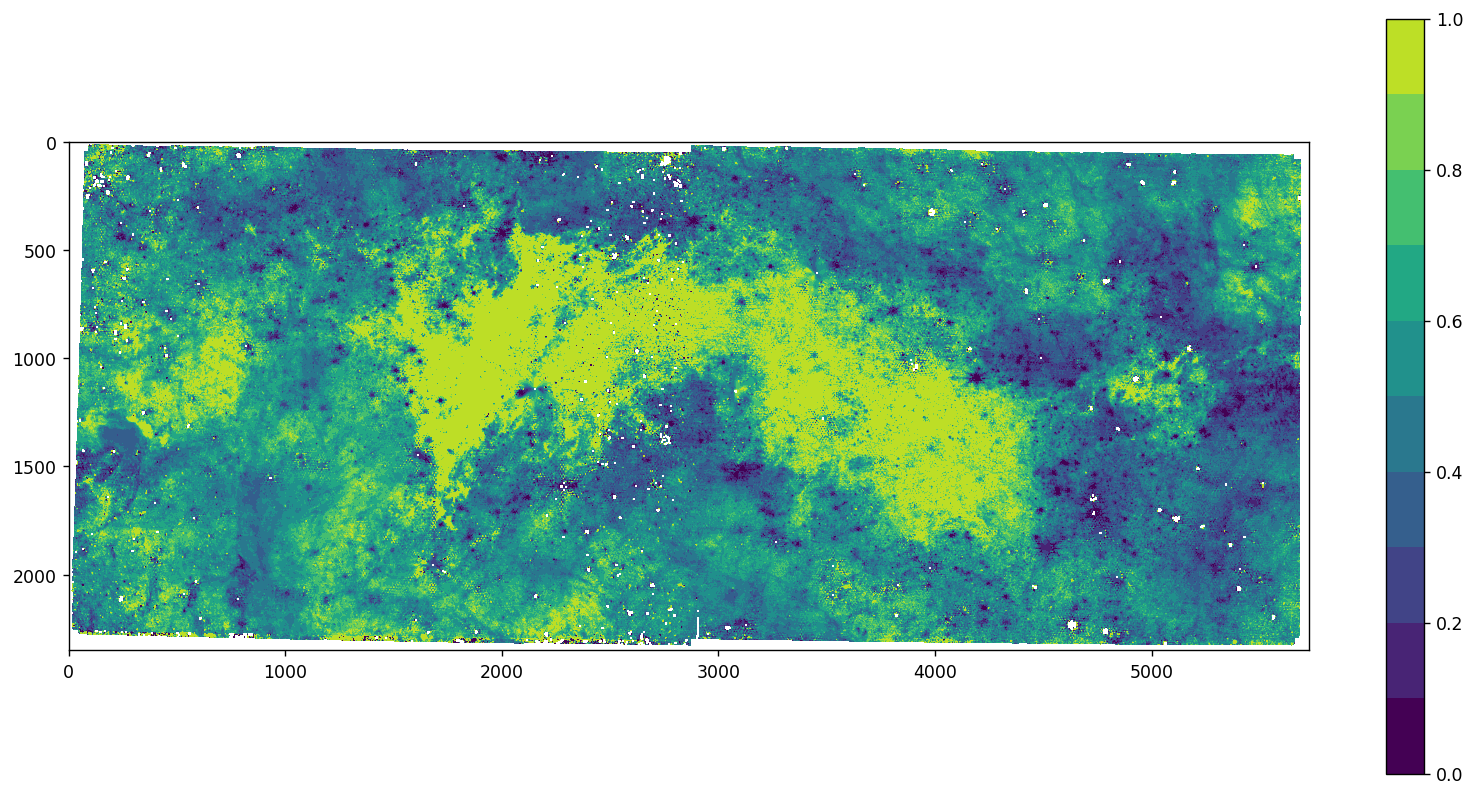

In [239]:
pl.figure(figsize=(16,8), dpi=125)
ratio = (f466ns / f405ns)
pl.imshow(ratio.T, vmax=1, vmin=0, cmap=discrete_cmap(10, base_cmap='viridis'))
pl.colorbar();
#pl.contour(ratio.T, levels=[0.26, 0.5], colors=['orange', 'red'], linewidths=[0.25]*2);

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


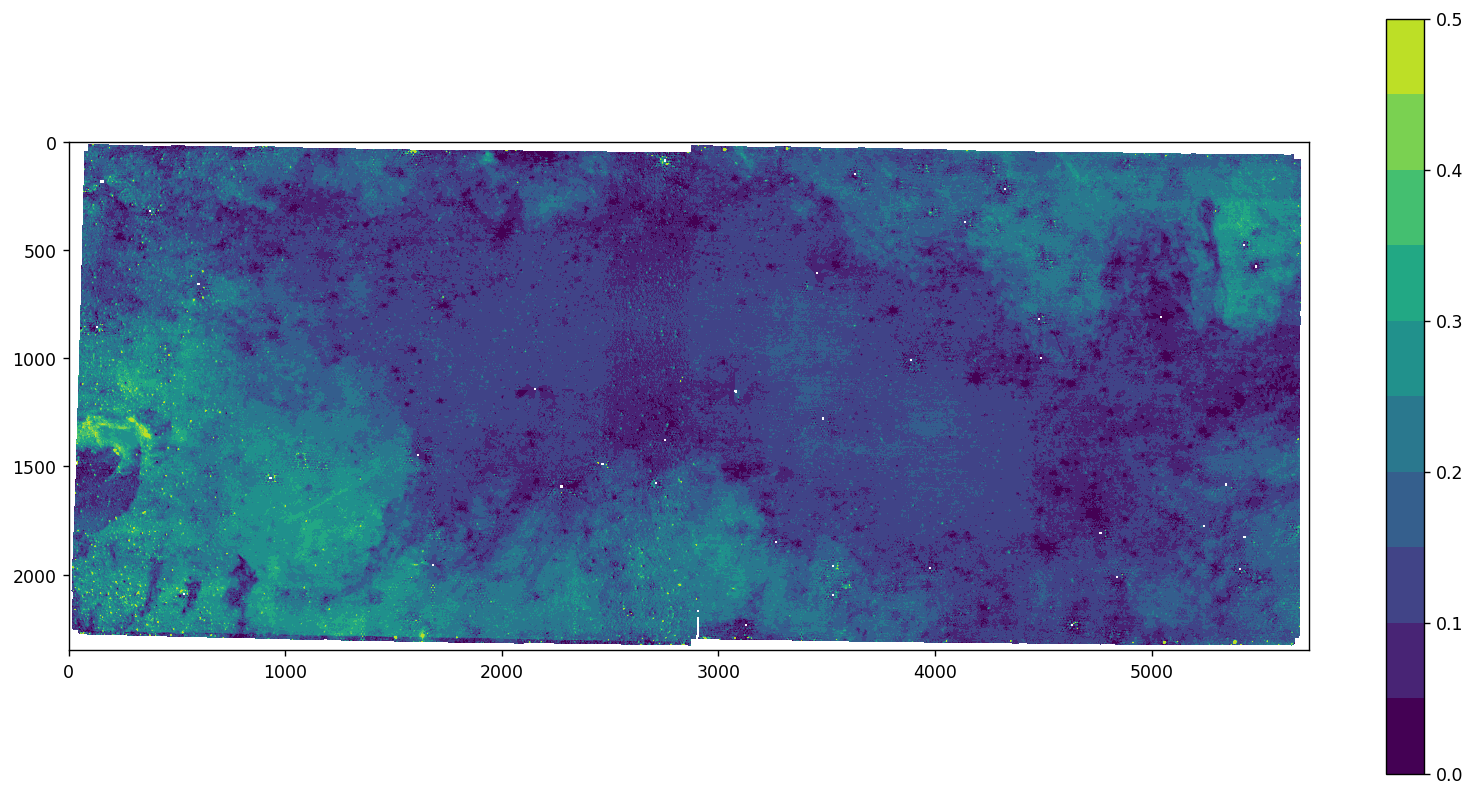

In [240]:
pl.figure(figsize=(16,8), dpi=125)
ratio_with_offset = (f466ns / (f405ns+25))
pl.imshow(ratio_with_offset.T, vmax=0.5, vmin=0, cmap=discrete_cmap(10, base_cmap='viridis'))
pl.colorbar();
#pl.contour(ratio.T, levels=[0.26, 0.5], colors=['orange', 'red'], linewidths=[0.25]*2);

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


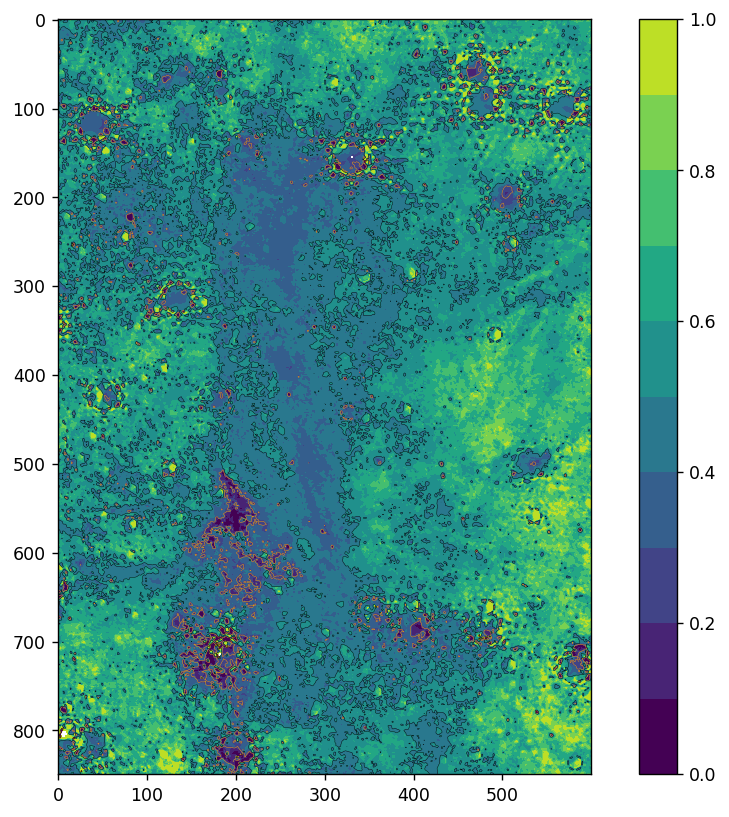

In [242]:
pl.figure(figsize=(10, 8), dpi=125)
slc = slice(1400, 2250), slice(600, 1200)
pl.imshow(ratio.T[slc], vmax=1, vmin=0, cmap=discrete_cmap(10, base_cmap='viridis'))
pl.colorbar();
pl.contour(ratio.T[slc], levels=[0.26, 0.5], colors=['orange', 'black'], linewidths=[0.25]*2);

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


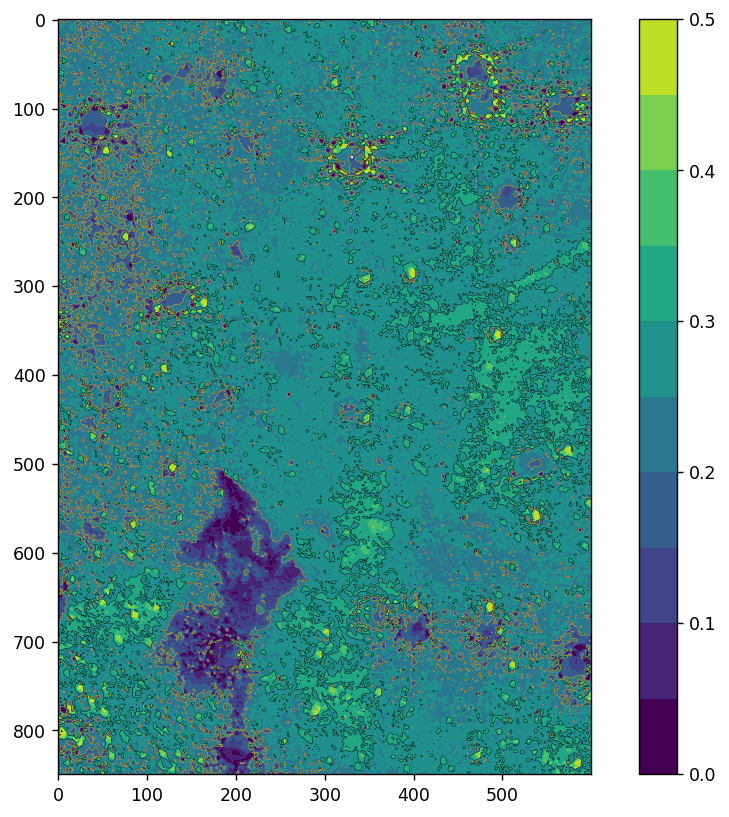

In [243]:
pl.figure(figsize=(10, 8), dpi=125)
slc = slice(1400, 2250), slice(600, 1200)
ratio_with_offset = (f466ns / (f405ns+25))
pl.imshow(ratio_with_offset.T[slc], vmax=0.5, vmin=0, cmap=discrete_cmap(10, base_cmap='viridis'))
pl.colorbar();
pl.contour(ratio_with_offset.T[slc], levels=[0.2, 0.3], colors=['orange', 'black'], linewidths=[0.25]*2);

In [195]:
np.nanpercentile(f405ns, p405), np.nanpercentile(f466ns, p466),

(4.515941151008739, 2.871399515595643)

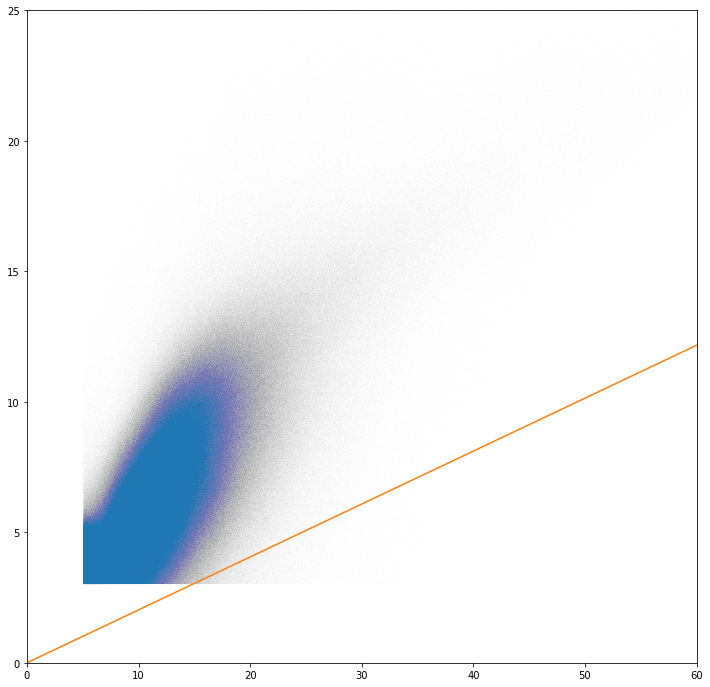

In [196]:
pl.figure(figsize=(12,12))
sel = (f466ns > 3) & (f466ns < 50)  & (f405ns > 5) & (f405ns < 150)
pl.plot(f405ns[sel], f466ns[sel], ',', alpha=0.005)
x = np.linspace(0,150)
pl.plot(x, x * pfb_to_bra)
pl.axis([0,60,0,25]);

In [197]:
import mpl_plot_templates

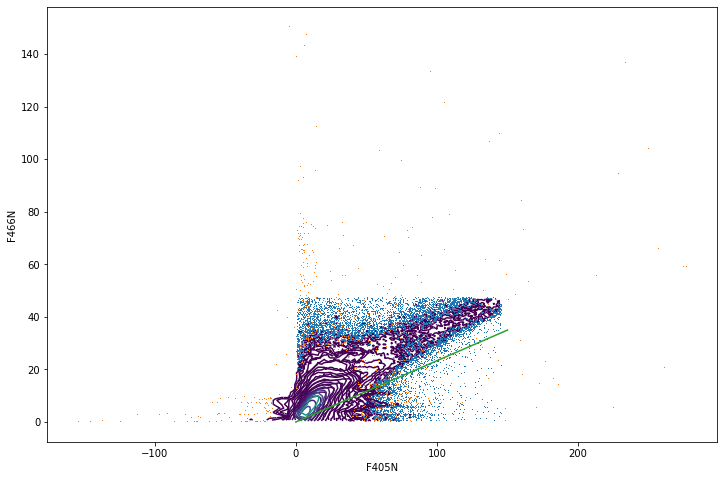

In [199]:
pl.figure(figsize=(12,8))
# try removing a background of ~10th percentile.... no apparent effect
mpl_plot_templates.adaptive_param_plot(f405ns[sel] - np.nanpercentile(f405ns, p405), f466ns[sel] - np.nanpercentile(f466ns, p466), bins=100, marker=',', ncontours=15);
pl.plot(x, x * pfb_to_bra_av30)
pl.ylabel("F466N");
pl.xlabel("F405N");

(0.0, 100.0, 0.0, 50.0)

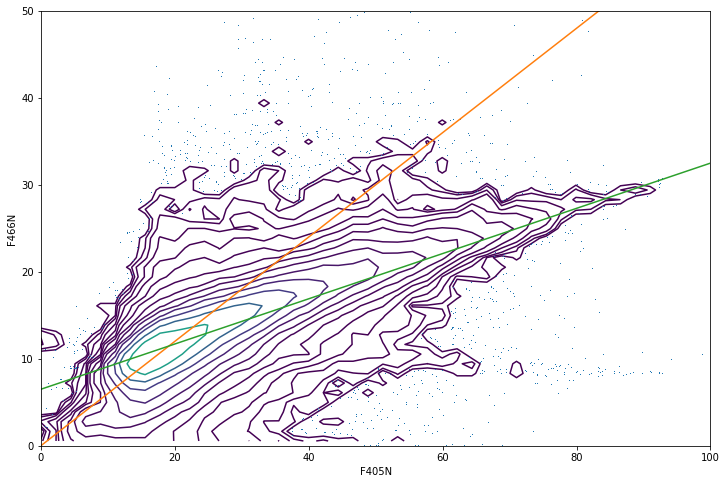

In [217]:
pl.figure(figsize=(12,8))
slc = slice(1500, 2200), slice(500, 1500)
slc = slice(1400, 2250), slice(600, 1200)
mpl_plot_templates.adaptive_param_plot(f405ns.T[slc], f466ns.T[slc], bins=100, marker=',', ncontours=15);
pl.plot(x, x * 0.6)
pl.plot(x, (x+25) * 0.26)
pl.ylabel("F466N");
pl.xlabel("F405N");
pl.axis([0,100,0,50])